In [369]:
import numpy as np
import matplotlib.pyplot as plt
import random

## grupo: 
GABRIEL ICHIRO BALDERRAMA VARGAS

JONATAN GERSON TERCEROS ORTEGA

SEBASTIAN SALAZAR VILLEGAS


Here we obtain a random number from a normal distribution with mean 0 and standar deviation 0.2

In [370]:

random_from_normal_dist = np.random.normal(3, 10)
random_from_normal_dist

3.7774910257574934

Argmax returns the position of the max number in an array.

In [371]:
np.argmax([1,0,5,6,10])

4

In [372]:
random.seed(10)

colors = ['blue', 'orange', 'green', 'red', 'purple']

# means and standar deviation for the K arms.
means = [5, 10, 20, 30, 40, 35, 60, 25, 19, 10]
std = [2, 10, 2, 3, 5, 4, 2, 1, 5, 2, 3]
K = len(means) # maquinas
N = 1000 # monedas - tiempo
print(means)
print(std)
print(K)

[5, 10, 20, 30, 40, 35, 60, 25, 19, 10]
[2, 10, 2, 3, 5, 4, 2, 1, 5, 2, 3]
10


In [373]:
# return the reward for that action from its corresponding normal distribution (that corresponds to the slot machine)
def bandit(action):
    return np.random.normal(means[action], std[action])

def get_action(Q, epsilon):
    if np.random.random() < epsilon:
        # choose a random action
        return np.random.randint(0, len(Q))
    else:
        # choose the action with the highest Q-value
        return np.argmax(Q)

def multi_armed_bandit(N, K, epsilon):
    Q = [0] * k
    count = [0] * k
    rewards_over_time = []
    for i in range(N):
        action = get_action(Q,epsilon)
        reward = bandit(action)
        rewards_over_time.append(reward)
        count[action]= count[action] + 1
        Q[action]= Q[action]+(1/count[action]*(reward - Q[action]))
    return rewards_over_time
    

In [374]:
# Average results
def run_N_times(N, K, epsilon):
    overall_rewards = []
    for i in range(N):
        overall_rewards.append(multi_armed_bandit(N,K,epsilon) )
    return overall_rewards



In [375]:
overall_rewards = run_N_times(N,K,epsilons[1])

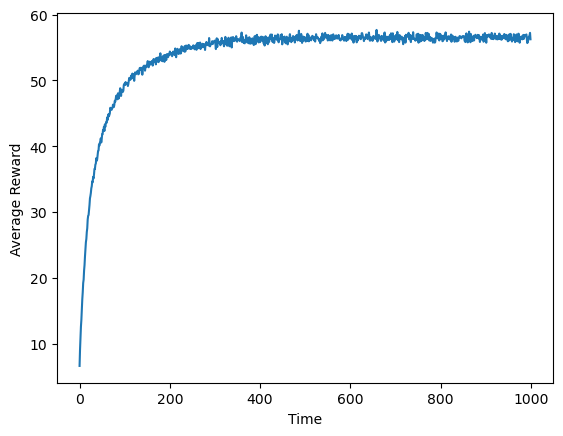

In [376]:
x = [i for i in range(N)]
y = np.mean(overall_rewards, axis=0)
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Average Reward')
plt.show()

# Experimentos


# 1. ¿Qué pasa cuando epsilon={0, 0.1, 0.2, 0.3, 1}? Grafica avg reward vs time en un mismo plot para poder compararlos. ¿Cuál valor de épsilon es el óptimo? ¿Por qué?

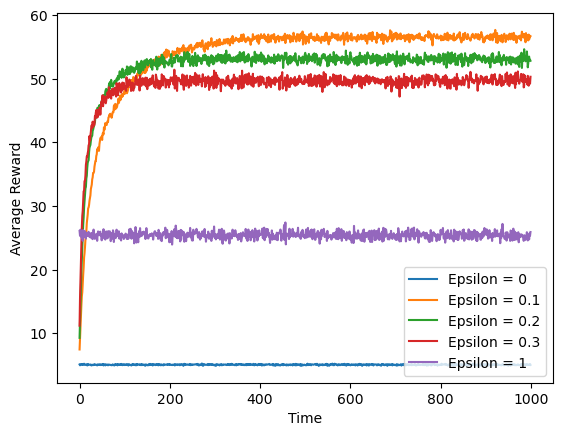

In [377]:
epsilon_list = [0, 0.1, 0.2, 0.3, 1]
y_total = []

for epsilon in epsilon_list:
    overall_rewards = run_N_times(N, K, epsilon)
    y = np.mean(overall_rewards, axis=0)
    y_total.append(y)

x = np.arange(N)  # Use np.arange instead of list comprehension for simplicity

for i, epsilon in zip(y_total, epsilon_list):
    i = i.reshape((-1,))  # Reshape i to match the shape of x
    plt.plot(x, i, label=f"Epsilon = {epsilon}")

plt.xlabel('Time')
plt.ylabel('Average Reward')
plt.legend()
plt.show()


# Respuestas 
1. el valor optimo de epsilon es 0.1 por que es el que tiene mayor valor promedio

# Experimentos

2. Varía epsilon en el tiempo empezando en 1 (full exploration) y terminando en 0 (full exploitation) siguiendo la formula epsilon = 1/square_root(t) (Decreasing epsilon greedy). Grafica el average reward vs time para epsilon greedy y decreasing epsilon greedy en un mismo plot para compararlos. ¿Cuál obtiene más reward?


In [378]:


def bandit(action):
    # Return the reward for the chosen action from its corresponding distribution
    return np.random.normal(means[action], std[action])

def epsilon_greedy(k, epsilon, num_steps):
    Q = np.zeros(k)  # Estimated values of each action
    N = np.zeros(k)  # Number of times each action has been chosen
    rewards_over_time = []

    for t in range(1, num_steps + 1):
        if np.random.random() < epsilon:
            # Choose a random action
            action = np.random.randint(0, k)
        else:
            # Choose the action with the highest estimated value
            action = np.argmax(Q)

        reward = bandit(action)
        rewards_over_time.append(reward)

        # Update action count and estimated value
        N[action] += 1
        Q[action] += (1 / N[action]) * (reward - Q[action])

    return rewards_over_time

def decreasing_epsilon_greedy(k, num_steps):
    Q = np.zeros(k)  # Estimated values of each action
    N = np.zeros(k)  # Number of times each action has been chosen
    rewards_over_time = []

    for t in range(1, num_steps + 1):
        epsilon = 1 / np.sqrt(t)  # Calculate epsilon based on the current step

        if np.random.random() < epsilon:
            # Choose a random action
            action = np.random.randint(0, k)
        else:
            # Choose the action with the highest estimated value
            action = np.argmax(Q)

        reward = bandit(action)
        rewards_over_time.append(reward)

        # Update action count and estimated value
        N[action] += 1
        Q[action] += (1 / N[action]) * (reward - Q[action])

    return rewards_over_time



In [379]:
# means and standar deviation for the K arms.
means = [5, 10, 20, 30, 40, 35, 60, 25, 19, 10]
std = [2, 10, 2, 3, 5, 4, 2, 1, 5, 2, 3]
k = len(means) # maquinas
N = 1000 # monedas - tiempo

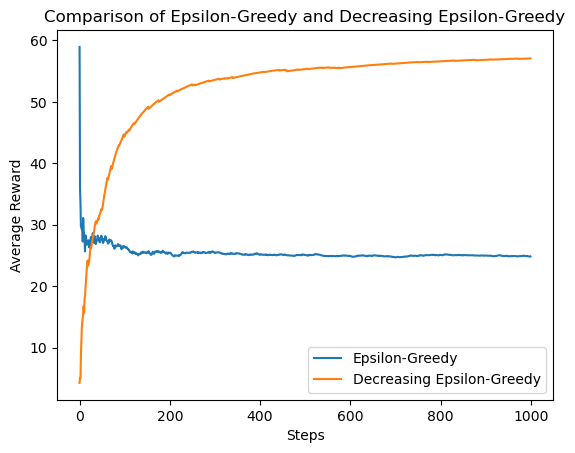

In [380]:
# Run epsilon-greedy algorithm
rewards_epsilon_greedy = epsilon_greedy(k, epsilon, N)

# Run decreasing epsilon-greedy algorithm
rewards_decreasing_epsilon_greedy = decreasing_epsilon_greedy(k, N)

# Plotting the results
x = np.arange(N) # more efficient than list comprehension
y_epsilon_greedy = np.cumsum(rewards_epsilon_greedy) / np.arange(1, N+1)  # Calculate cumulative average reward for epsilon-greedy
y_decreasing_epsilon_greedy = np.cumsum(rewards_decreasing_epsilon_greedy) / np.arange(1, N+1)  # Calculate cumulative average reward for decreasing epsilon-greedy

plt.plot(x, y_epsilon_greedy, label='Epsilon-Greedy')
plt.plot(x, y_decreasing_epsilon_greedy, label='Decreasing Epsilon-Greedy')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of Epsilon-Greedy and Decreasing Epsilon-Greedy')
plt.legend()
plt.show()

# Respuestas 
2 El algoritmo greedy decreasing epsilon tiende a alcanzar recompensas promedio más altas en comparación con el algoritmo epsilon greesy porque equilibra mejor la exploración-explotación y es mas efectivo a lo largo del tiempo
Sin embargo, es importante tener en cuenta que el rendimiento de estos algoritmos también puede depender del problema y el entorno específicos. En algunos escenarios, un epsilon estatico puede ser más adecuado, mientras que en otros, un epsilon decresciente u otros métodos de exploración dinamicos pueden ser más efectivos.

# Experimentos
## 3. Grafica el número de veces que cada brazo fue seleccionado tras una sola llamada a multi_armed_bandit() con epsilon 0.1 y con epsilon = 1/square_root(t). ¿Cuál de ellos es el que fue seleccionado más/menos veces? ¿Por qué?


In [399]:
epsilon = 1
overall_rewards = []
n_machines = []
list_arms = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(list_arms)):
    n_machines.append(i)

def multi_armed_bandit_arms():
    Q = [0] * k
    count = [0] * k
    rewards_over_time = []
    for i in range(N):
        action = get_action(Q, epsilon)
        list_arms[action] += 1
        reward = bandit(action)
        rewards_over_time.append(reward)
        count[action] = count[action] + 1
        Q[action] = Q[action] + (1/count[action] * (reward - Q[action]))
    overall_rewards.append(rewards_over_time)
    return list_arms




In [400]:
arms_count = multi_armed_bandit_arms()
print(arms_count, "most selected arm: " ,  arms_count.index( max(arms_count) ) )

[90, 101, 105, 98, 91, 99, 116, 108, 98, 94] most selected arm:  6


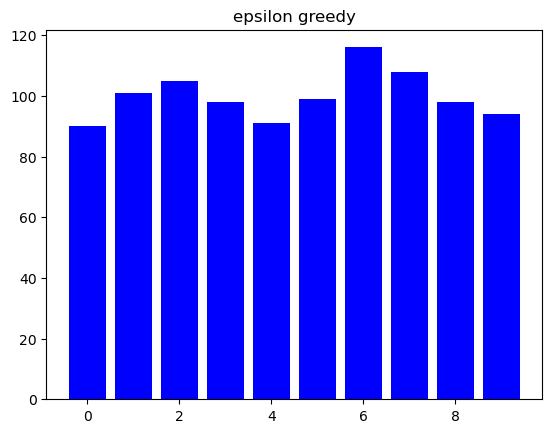

In [401]:
plt.bar(n_machines, arms_count, color='blue')
plt.title("epsilon greedy")
plt.show()

In [402]:
epsilon = 1
overall_rewards = []
n_machines = []
list_arms = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(list_arms)):
    n_machines.append(i)

def multi_armed_bandit_decreasing_epsilon():
    Q = [0] * k
    count = [0] * k
    rewards_over_time = []
    for i in range(N):
        epsilon = 1 / np.sqrt(i + 1)  # Decreasing epsilon value
        action = get_action(Q, epsilon)
        list_arms[action] += 1
        reward = bandit(action)
        rewards_over_time.append(reward)
        count[action] = count[action] + 1
        Q[action] = Q[action] + (1/count[action] * (reward - Q[action]))
    overall_rewards.append(rewards_over_time)
    return list_arms


In [403]:
arms_count = multi_armed_bandit_decreasing_epsilon()
print(arms_count, "most selected arm: " ,  arms_count.index( max(arms_count) ) )

[7, 3, 4, 6, 7, 10, 942, 5, 10, 6] most selected arm:  6


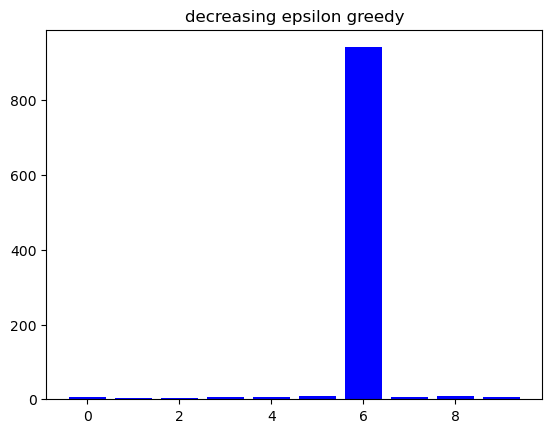

In [404]:

plt.bar(n_machines, arms_count, color='blue')
plt.title("decreasing epsilon greedy")

plt.show()


# Respuestas 
3. En el caso de greedy epsilon parece ser bastante aleatorio ya que al correr el algoritmo d=varias veces se obtienen diferenets brazos, lo cual es esperado por el comportamiento randomico del algroritmo
Mientras tanto, en el caso del algoritmo que usa decreasing greedy epsilon , se sabe que primero selecciona brazos al azar pero a medida que el epsilon (exploration rate) decrece. va seleccionando el brazo que tienda a dar mayor recompensa. 

La mayor frecuencia de selección para el brazo número 6 sugiere que ha dado recompensas relativamente más altas en comparación con los otros brazos. A medida que el algoritmo explora y aprende, reconoce gradualmente el brazo con la recompensa más alta y lo explota con más frecuencia. Esto lleva a que el brazo número 6 se seleccione más veces a medida que avanza el algoritmo

Es importante tener en cuenta que el comportamiento específico del algoritmo y la distribución de recompensas entre los brazos pueden variar segun el problema que se resuelva. Los resultados pueden verse influenciados por factores como las recompensas promedio (average reward) y la naturaleza aleatoria de las recompensas generadas por cada brazo.